<a href="https://colab.research.google.com/github/Samra-63/Projects-/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Image Classifier
This project trains a Convolutional Neural Network **(CNN)** on the CIFAR-10 dataset to classify images into 10 categories like airplanes, cats, and trucks. It loads and normalizes the data, builds a CNN with three convolutional layers, trains the model for 10 epochs, and then evaluates it by printing the test accuracy, a detailed classification report, and displaying a confusion matrix.

To run it, install the required packages with pip install tensorflow numpy matplotlib scikit-learn, then execute python ml_project.py. The script will train the model and show the results. You can tweak the model or training settings to experiment. Have fun!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import tensorflow as tf

In [ ]:
# Importing necessary modules from TensorFlow Keras for building and training neural networks.
from tensorflow.keras import datasets,layers,models

In [ ]:
# Loading the CIFAR-10 dataset and splits it into training and testing images and labels.
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [ ]:
# Normalizing the pixel values of the training and test images to the range [0, 1] by dividing by 255.
train_images,test_images = train_images/255.0, test_images/255.0

In [ ]:
len(train_images)

50000

In [ ]:
# Defining a CNN model with 3 convolutional layers, max-pooling, and a softmax output for multi-class classification.
model = models.Sequential([
layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
layers.MaxPool2D((2,2)),
layers.Conv2D(64,(3,3), activation='relu'),
layers.MaxPool2D((2,2)),
layers.Conv2D(64,(3,3), activation='relu'),
layers.Flatten(),
layers.Dense(64,activation='relu'),
layers.Dense(10,activation='softmax')])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model with Adam optimizer, categorical crossentropy loss, and accuracy as the evaluation metric.
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# Converting the training labels to one-hot encoded format for categorical classification.
train_labels_one_hot = to_categorical(train_labels)

In [ ]:
# converting the test labels into one-hot encoded format, preparing them for categorical classification.
test_labels_one_hot= to_categorical(test_labels)

In [ ]:
# Training the model for 10 epochs and evaluates its performance on the test set.
model.fit(train_images,train_labels_one_hot,epochs=10,validation_data=(test_images,test_labels_one_hot))
test_loss, test_acc = model.evaluate(test_images,test_labels_one_hot,verbose=2)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3431 - loss: 1.7815 - val_accuracy: 0.5420 - val_loss: 1.2656
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5773 - loss: 1.1881 - val_accuracy: 0.6138 - val_loss: 1.1014
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6408 - loss: 1.0258 - val_accuracy: 0.6371 - val_loss: 1.0133
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6772 - loss: 0.9245 - val_accuracy: 0.6824 - val_loss: 0.9097
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7027 - loss: 0.8496 - val_accuracy: 0.6738 - val_loss: 0.9223
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7247 - loss: 0.7881 - val_accuracy: 0.7010 - val_loss: 0.8562
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7419 - loss: 0.7362 - val_accuracy: 0.6853 - val_loss: 0.9072
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7544 - loss: 0.7038 

In [ ]:
# Evaluating the trained model on the test set and returns the loss and accuracy.
test_loss, test_acc=model.evaluate(test_images,test_labels_one_hot,verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.7032 - loss: 0.9001


In [ ]:
# Printing the test accuracy of the model after evaluation.
print(f"Test Accuracy:{test_acc}")

Test Accuracy:0.7031999826431274


In [ ]:
# Importing necessary libraries for numerical operations, plotting, evaluation metrics, and data preprocessing.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical


In [ ]:
# Prediction on the test set
test_predictions = model.predict(test_images)
predicted_classes = np.argmax(test_predictions, axis=1)
true_classes = np.squeeze(test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [ ]:
#  Classification Report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=[
    "Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"
])
print(report)

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.72      0.75      0.73      1000
     Class 1       0.76      0.88      0.82      1000
     Class 2       0.67      0.56      0.61      1000
     Class 3       0.55      0.50      0.53      1000
     Class 4       0.72      0.58      0.64      1000
     Class 5       0.59      0.63      0.61      1000
     Class 6       0.78      0.78      0.78      1000
     Class 7       0.70      0.79      0.74      1000
     Class 8       0.73      0.82      0.77      1000
     Class 9       0.81      0.75      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



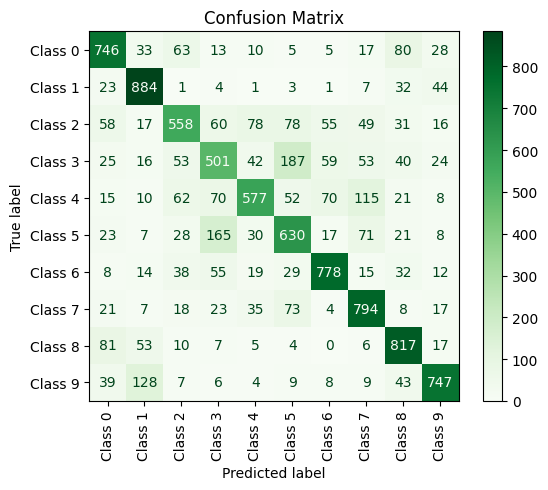

In [ ]:
#  Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[
    "Class 0", "Class 1", "Class 2", "Class 3", "Class 4", "Class 5", "Class 6", "Class 7", "Class 8", "Class 9"
]).plot(cmap='Greens', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()
